## Plot Truth and Predicted Bounding boxes
Plot the ground truth bounding boxes and the predicted bounding boxes after training a yolo model and evaluating the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from matplotlib.patches import Rectangle
from pathlib import Path

In [2]:
def plot_bb_ss_2(img1, border_img1, border_img2, conf):
    #Plot the images side by side with the confidence scores. 

    img = Image.open(img1)
    row = 1
    col=2

    plt.figure()
    fig, axs = plt.subplots(row, col)

    axs[0].imshow(img)
    axs[1].imshow(img)
    
    axs[1].set_title(f"Predicted \n confidence scores: {conf}")
    axs[0].set_title(f"Ground Truth \n ")


    for border in border_img1:
        axs[0].add_patch(border)
    
    for border in border_img2:
        axs[1].add_patch(border)
        
    axs[0].legend(loc='lower right')
    axs[1].legend(loc='lower right')

    plt.show()

In [3]:
def find_border(x1, y1, x2, y2):   
        #(x1, y1) = top left corner, (x2, y2) = bottom right corner
        box_height = y2 - y1
        box_width = x2 - x1
        border = Rectangle((x1, y1), box_width, box_height, linewidth=1, edgecolor ='red', facecolor = 'none', fill=False) 
        return border

def find_border_yolo(x_center, y_center, box_width, box_height, height, width, label_box, color):    
        xmin = (x_center * width) - ((box_width*width)/2)
        ymin = (y_center * height) - ((box_height*height)/2)
        border = Rectangle((xmin, ymin), (box_width * width), (box_height * height), linewidth=1, edgecolor = color, label=label_box, facecolor = 'none', fill=False) 
        return border

In [4]:
#Read textfile and extract label, x_center, y_center, box_width, box_height

def read_txtfile(file, predict=False):
    array = []

    with open(file, "r") as txtfile:
        for line in txtfile:
            line_array = []

            line = line.replace("\n", "")
            line = line.split(" ")
            label = line[0]
            x_center = line[1]
            y_center = line[2]
            box_width = line[3]
            box_height = line[4]
            if predict == True:
                conf = line[5]
                line_array.extend([label, x_center, y_center, box_width, box_height, conf])
            else:
                line_array.extend([label, x_center, y_center, box_width, box_height])
            array.append(line_array)
            
    txtfile.close()
    return array



In [5]:
#Find Image, textfiles and plot

def image_bb(image_path, ground_truth, predicted):
    img = Image.open(image_path)
    height = img.height
    width = img.width

    colors = ["red", "blue", "orange", "green"]
    colors_2 =["pink", "yellow", "purple"]

    #Ground Truth
    ground_truth_array = read_txtfile(ground_truth)
    ground_truth_box = []
    
    for number, element in enumerate(ground_truth_array):
        label = element[0]
        if label == "0":
            label = "Transversal"
        elif label == "1":
            label = "Longitudinal"
        elif label == "2":
            label = "Vessel"
        elif label == "3":
            label = "Anastomosis"
        elif label == "4":
            label = "Aorta"
        border = find_border_yolo(float(element[1]), float(element[2]), float(element[3]), float(element[4]), height, width, label, colors[number])
        ground_truth_box.append(border)



    #Predicted Array
    predicted_array = read_txtfile(predicted, predict=True)
    predicted_box = []
    conf_scores = []

    for number, element in enumerate(predicted_array):
        label = element[0]
        if label == "0":
            label = "Transversal"
        elif label == "1":
            label = "Longitudinal"
        elif label == "2":
            label = "Vessel"
        elif label == "3":
            label = "Anastomosis"
        elif label == "4":
            label = "Aorta"
        border = find_border_yolo(float(element[1]), float(element[2]), float(element[3]), float(element[4]), height, width, label, colors_2[number])
        predicted_box.append(border)
        conf_scores.append(element[5])

    return ground_truth_box, predicted_box, conf_scores

### Print out all images in Validation

In [6]:
def confidence(conf_scores):
    #Find the max score for each image
    for score in conf_scores:
        score = float(score)
    
    max_score = max(conf_scores)

    return max_score
    

In [7]:
def print_all(predicted, ground_truth, image_root):
    #Print the images in the validation folder with bounding boxes and confidence scores
    
    plot_array = []
    score_array  = []

    #Find the path to the text files and image
    for file in os.listdir(predicted):
        predicted_path = f"{predicted}/{file}"
        ground_truth_path = f"{ground_truth}/{file}"
        check = Path(ground_truth_path)

        image = file.split(".")[0]
        image_path = f"{image_root}/{image}.png"

        if check.exists() == False:
            continue
        ground_truth_box, predicted_box, conf_scores = image_bb(image_path, ground_truth_path, predicted_path)

        #Save the confidence score
        score_array.append(conf_scores)
        score = confidence(conf_scores)
        plot_array.append([image_path, ground_truth_box, predicted_box, score])

    score_list = []
    for element in plot_array:
        score_list.append(element[3])
    

    #The five images with the highest confidence score
    print("The Five Images with the highest confidence score:")
    ind = np.argpartition(score_list,-5)[-5:]
    for element in ind:
        top = score_array[element]
        plot_bb_ss_2(plot_array[element][0], plot_array[element][1], plot_array[element][2], top)
    
    #The two images with the lowest confidence score
    print("The Five Images with the lowest confidence score:")
    low_list = np.argpartition(score_list, 5)[:5]
    for element in low_list:
        low = score_array[element]
        plot_bb_ss_2(plot_array[element][0], plot_array[element][1], plot_array[element][2], low)



The Five Images with the highest confidence score:


<Figure size 640x480 with 0 Axes>

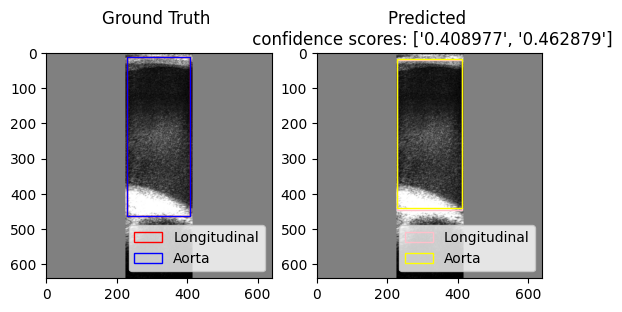

<Figure size 640x480 with 0 Axes>

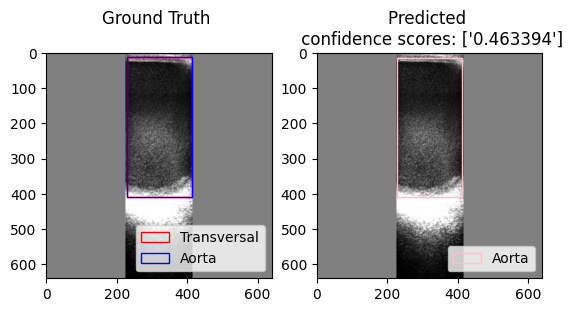

<Figure size 640x480 with 0 Axes>

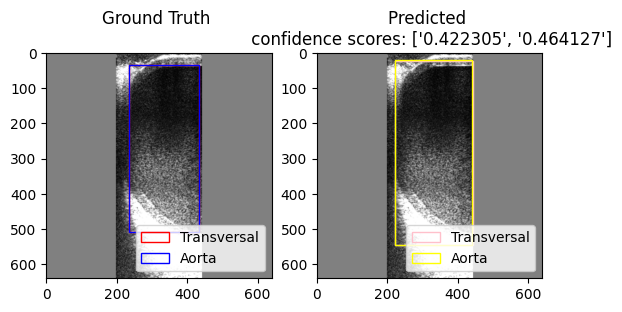

<Figure size 640x480 with 0 Axes>

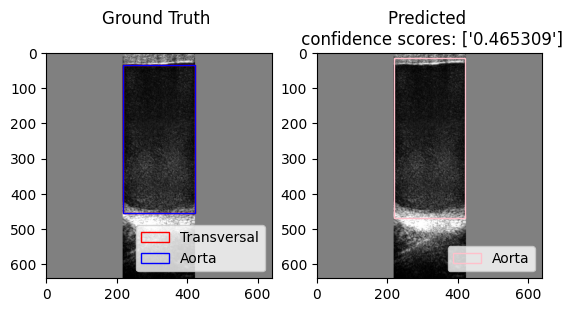

<Figure size 640x480 with 0 Axes>

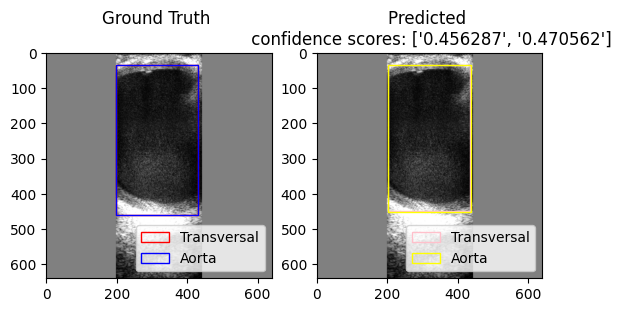

The Five Images with the lowest confidence score:


<Figure size 640x480 with 0 Axes>

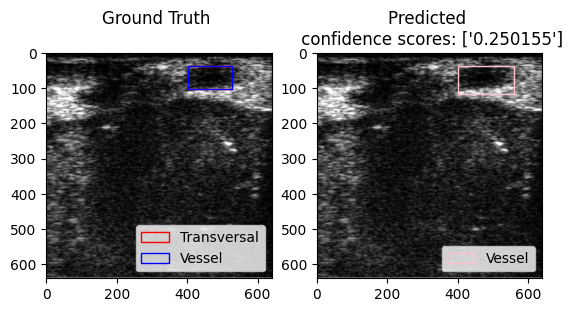

<Figure size 640x480 with 0 Axes>

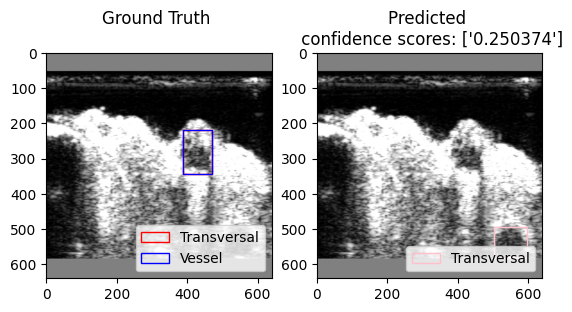

<Figure size 640x480 with 0 Axes>

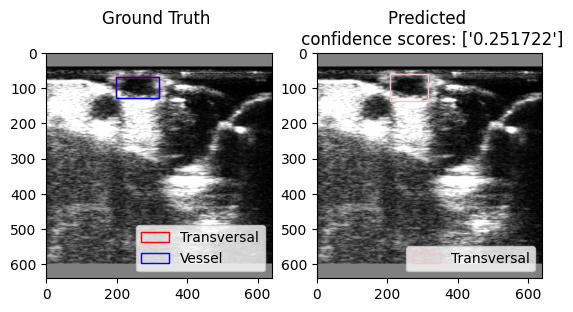

<Figure size 640x480 with 0 Axes>

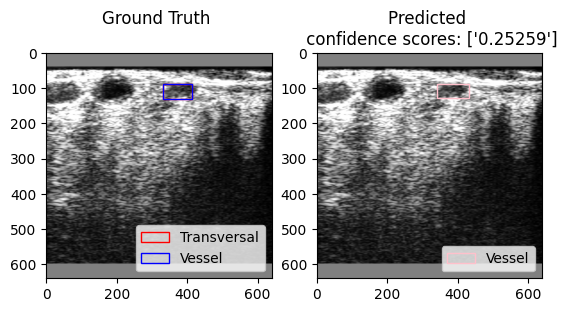

<Figure size 640x480 with 0 Axes>

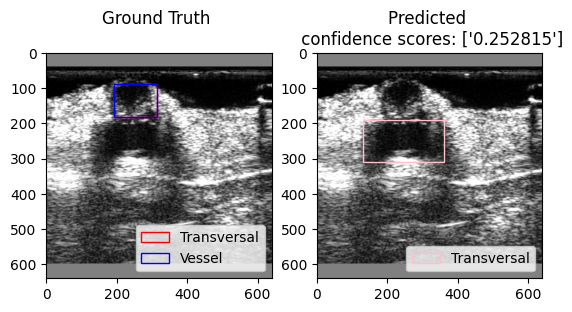

In [8]:
image_root = "/Volumes/T7/Master/Data_augment/Yolov5/Request_da_2/images/val"
ground_truth = "/Volumes/T7/Master/Data_augment/Yolov5/Request_da_2/labels/val"
predicted = "/Volumes/T7/Master/Data_augment/yolo_predicted_labels"

print_all(predicted, ground_truth, image_root)